In [1]:
import platform
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import xgboost as xgb
import lightgbm as lgb


# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'

# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# 데이터 디렉토리 파일 확인
import os
print(os.listdir("./input_2019-2nd-ml-month-with-kakr/"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [9]:
# train, test 데이터 read(dataframe)
train = pd.read_csv("./input_2019-2nd-ml-month-with-kakr/train.csv")
test = pd.read_csv("./input_2019-2nd-ml-month-with-kakr/test.csv")

In [10]:
train.shape

(15035, 21)

In [12]:
test.shape

(6468, 20)

# train data 확인

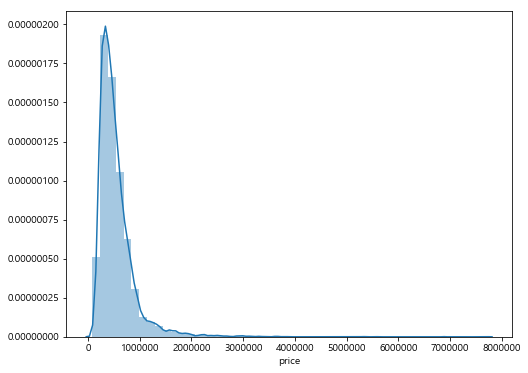

In [13]:
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['price'])

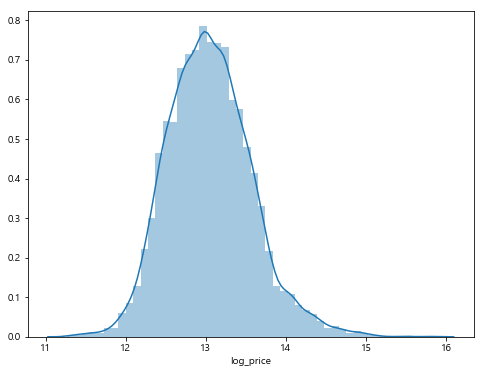

In [14]:
train['log_price'] = np.log1p(train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['log_price'])

In [15]:
# 이전 랜덤 포레스트 사용 시 log scale이 score가 떨어져서 해당 log는 이후에 다시 화용하는 것으로 함
# log_scale 삭제
del train["log_price"]

# price와 각 데이터 확인
## grade, view, floors, sqft_living, condition, lot, long

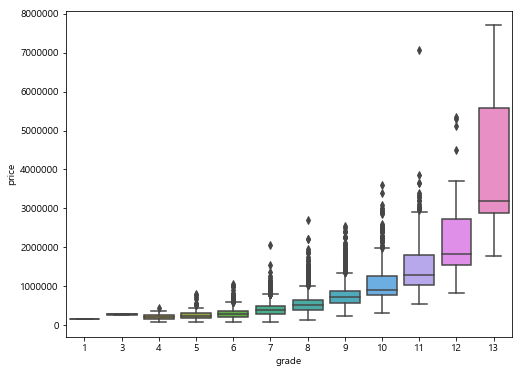

In [16]:
#grade
data = pd.concat([train['price'], train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [17]:
# grade 1과 3의 데이터 확인 필요

In [18]:
# grade의 3에 price 확인
train.loc[(train['grade'] == 3) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [19]:
# grade의 3에 price 확인
test.loc[(test['grade'] == 3) ]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
310,15345,20150217T000000,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


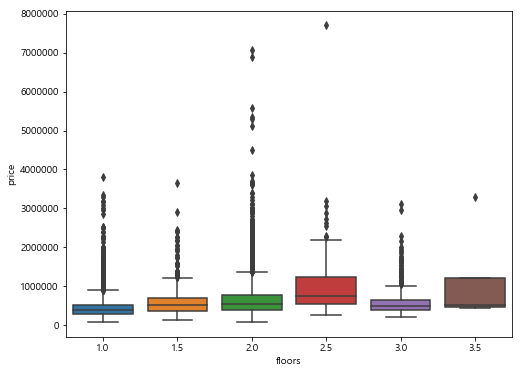

In [20]:
#grade
data = pd.concat([train['price'], train['floors']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='floors', y="price", data=data)

In [21]:
# floors의 2.0에 높은 price 확인
train.loc[(train['floors'] == 2) & (train['price'] > 6000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [22]:
# floors의 2.5에 높은 price 확인
train.loc[(train['floors'] == 2.5) & (train['price'] > 6000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [23]:
## 해당 모두 grade가 높고 방 갯수 등이 많은 것으로 정상적인 데이터호 확인됨

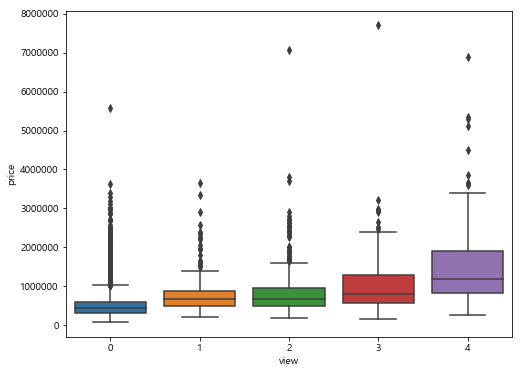

In [24]:
#view
data = pd.concat([train['price'], train['view']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='view', y="price", data=data)

In [25]:
# view의 0에 높은 price 확인
train.loc[(train['view'] >= 0) & (train['price'] > 5500000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [26]:
#view가 낮아도 가격이 높은 것은 beadrooms과 bathroom으로 봤을 때 정상적인 데이터로 예상됨

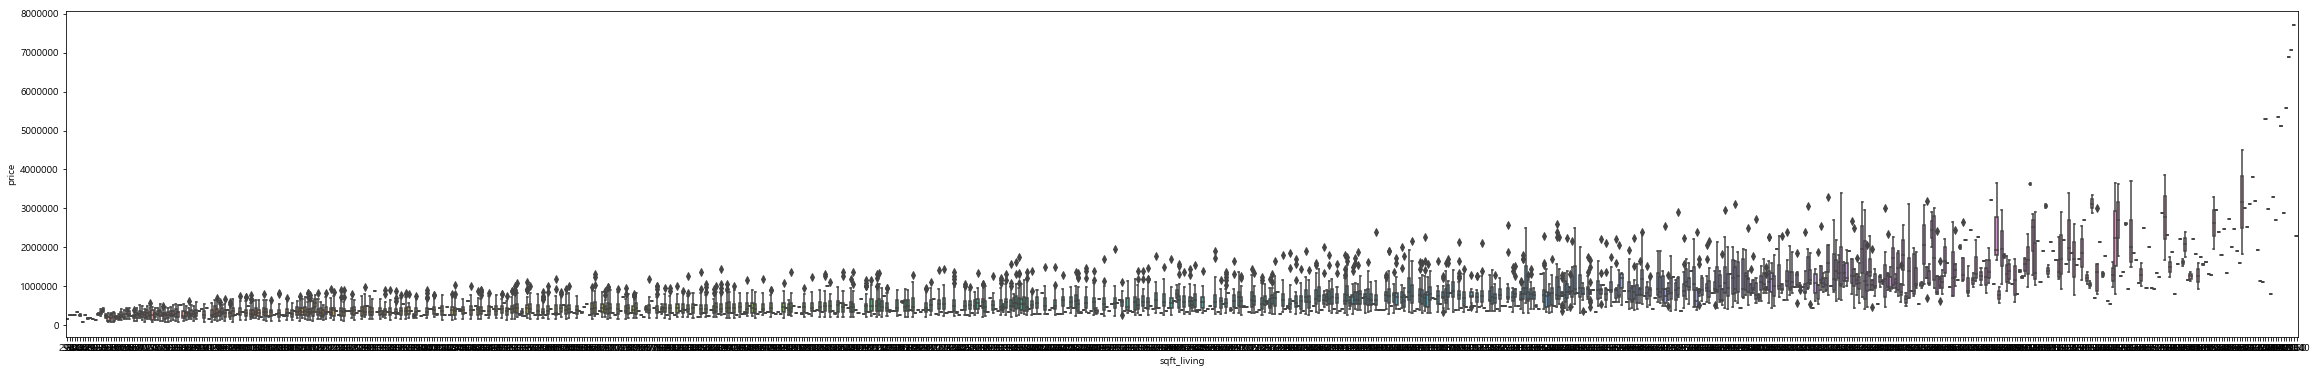

In [27]:
#sqft_living
data = pd.concat([train['price'], train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(40, 6))
fig = sns.boxplot(x='sqft_living', y="price", data=data)

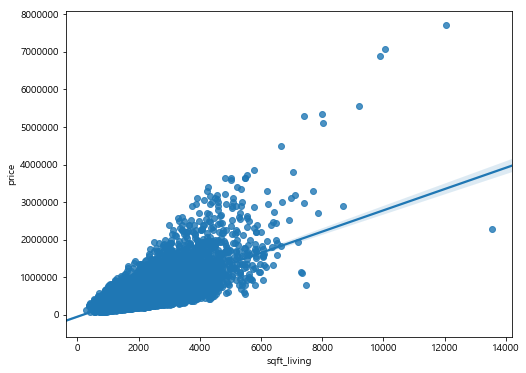

In [40]:
#데이터 확인이 어려워 다른 형태로 확인
data = pd.concat([train['price'], train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

In [42]:
#지나치게 높은 가격 및 넓이 확인
train.loc[(train['sqft_living'] > 9000) & (train['price'] > 6000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [45]:
# 그래이드 및 기타 사항으로 볼 때 정상적인 수치로 파악됨

In [28]:
# 다른 값 확인
#지나치게 높은 가격 및 넓이 확인
train.loc[(train['sqft_living'] > 12000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8912,8912,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [29]:
# 해당 데이터의 bathroom 이 너무 많으니 다른 데이터와 비교 화긴
train.loc[(train['bathrooms'] >= 8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8912,8912,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [30]:
#테스트 데이터에 있는지 확인 
test.loc[(test['bathrooms'] >= 8)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [31]:
#해당 데이터 삭제 2개 5108, 8912

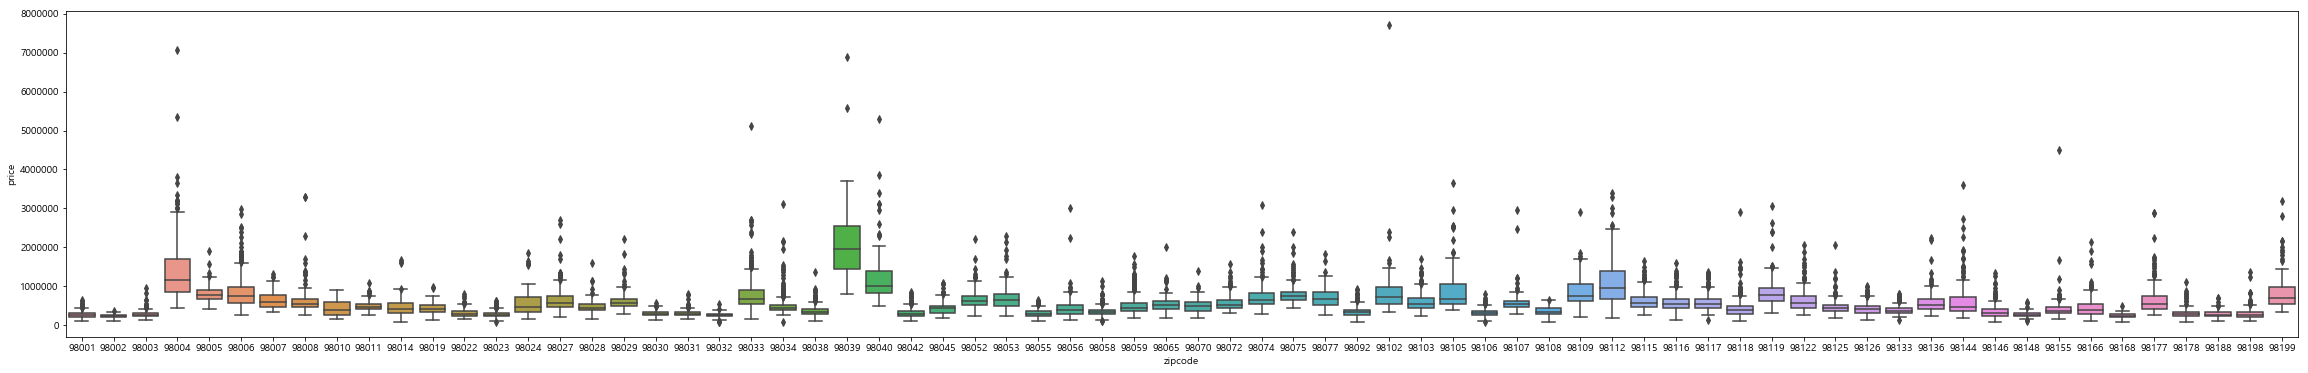

In [32]:
# zipcode 분석
data = pd.concat([train['price'], train['zipcode']], axis=1)
f, ax = plt.subplots(figsize=(40, 6))
fig = sns.boxplot(x='zipcode', y="price", data=data)

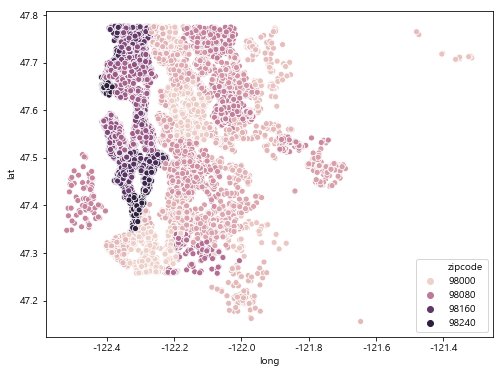

In [33]:
data = train
data['price'] = train["price"]

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x='long', y='lat', hue='zipcode', hue_order=np.sort(data['zipcode'].unique()), data=data);

In [34]:
#zipcode는 ㅇ총 5자리 중 98은 동일 3번쨰 자리는 0과 1로 분류 그 다음 구조
# 나눠서 확인
train['zipcode-1'] = train['zipcode'].astype(str).str[2:3].astype(int) #3번쨰 자리 숫자1개
train['zipcode-2'] = train['zipcode'].astype(str).str[3:5].astype(int) #4번쨰 자리 숫자1개

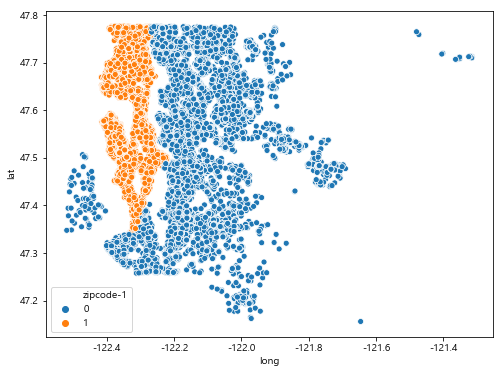

In [35]:
data = train
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x='long', y='lat', hue='zipcode-1', hue_order=np.sort(data['zipcode-1'].unique()), data=data);

In [36]:
# 0과 1로 지역에 따른 분류 확인 뒤에 2자리 확인

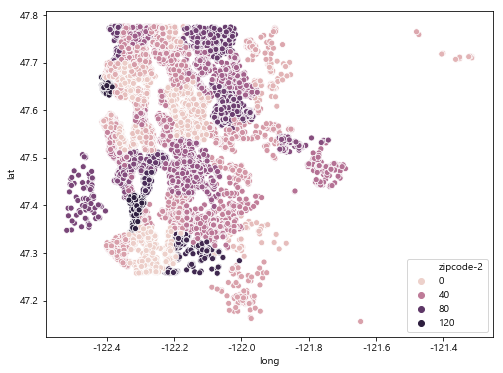

In [37]:
data = train
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x='long', y='lat', hue='zipcode-2', hue_order=np.sort(data['zipcode-2'].unique()), data=data);

In [43]:
#zip code를 3번쨰 자리, 45번째 자리로 눠눠서 데이터 수정 필요

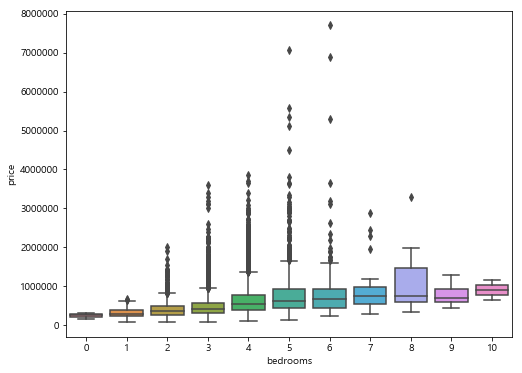

In [45]:
#bedrooms
data = pd.concat([train['price'], train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

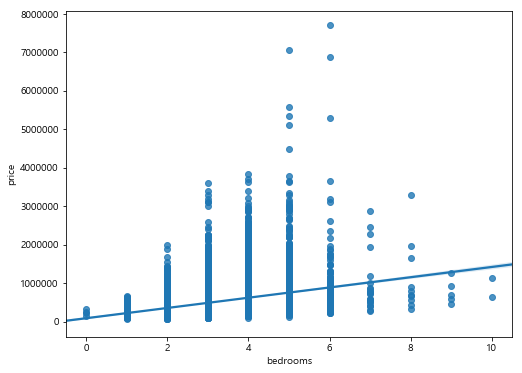

In [47]:
#데이터 확인이 어려워 다른 형태로 확인
data = pd.concat([train['price'], train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='bedrooms', y="price", data=data)

In [48]:
# bedroom 0개 bathroom 0개 데이터 확인
train.loc[(train['bedrooms'] == 0) & (train['bathrooms'] == 0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode-1,zipcode-2
6885,6885,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,0,1996,0,98065,47.5265,-121.828,1060,7200,0,65
13522,13522,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,0,1963,0,98024,47.5308,-121.888,1620,22850,0,24


In [49]:
# bedroom 0개 bathroom 0개 데이터 확인
test.loc[(test['bedrooms'] == 0) & (test['bathrooms'] == 0)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
230,15265,20140612T000000,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
876,15911,20150205T000000,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
2029,17064,20140624T000000,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
2900,17935,20150429T000000,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4277,19312,20150413T000000,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600


# Train 파일에서 가격 대비 이상한 값 제거 
## 2개 5108, 8912
## 2ro 2302, 4123


In [50]:
train.loc[train['sqft_living'] > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode-1,zipcode-2
5108,5108,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1,2
8912,8912,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,4130,1999,0,98053,47.6675,-121.986,4850,217800,0,53


In [51]:
train = train.drop(train.id[[8912,5108]])

In [52]:
#삭제 데이터 확인
train.loc[train['sqft_living'] > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode-1,zipcode-2


In [53]:
train.loc[train['grade'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode-1,zipcode-2
2302,2302,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,...,0,1920,0,98022,47.2082,-121.995,1340,12233,0,22
4123,4123,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,...,0,1950,0,98045,47.5316,-121.749,990,22549,0,45


In [54]:
train = train.drop(train.id[[2302,4123]])

In [55]:
train.loc[train['grade'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode-1,zipcode-2


# zip code를 zip1, zip2로 나누고 
# train 과 test에 모두 적용

In [56]:
train['zipcode-1'] = train['zipcode'].astype(str).str[2:3].astype(int) #3번쨰 자리 숫자1개
train['zipcode-2'] = train['zipcode'].astype(str).str[3:5].astype(int) #4번쨰 자리 숫자1개

test['zipcode-1'] = test['zipcode'].astype(str).str[2:3].astype(int) #3번쨰 자리 숫자1개
test['zipcode-2'] = test['zipcode'].astype(str).str[3:5].astype(int) #4번쨰 자리 숫자1개

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15034
Data columns (total 23 columns):
id               15031 non-null int64
date             15031 non-null object
price            15031 non-null float64
bedrooms         15031 non-null int64
bathrooms        15031 non-null float64
sqft_living      15031 non-null int64
sqft_lot         15031 non-null int64
floors           15031 non-null float64
waterfront       15031 non-null int64
view             15031 non-null int64
condition        15031 non-null int64
grade            15031 non-null int64
sqft_above       15031 non-null int64
sqft_basement    15031 non-null int64
yr_built         15031 non-null int64
yr_renovated     15031 non-null int64
zipcode          15031 non-null int64
lat              15031 non-null float64
long             15031 non-null float64
sqft_living15    15031 non-null int64
sqft_lot15       15031 non-null int64
zipcode-1        15031 non-null int32
zipcode-2        15031 non-null int32
dtypes

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 22 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
zipcode-1        6468 non-null int32
zipcode-2        6468 non-null int32
dtypes: float64(4), int32(2), int64(15), object(1)
memory usage: 1.0+ 

# id/ data zipcode 삭제

In [59]:
# train 데이터셋을 학습에 사용할 train feature 데이터프레임에 추가(price 칼럼 제외)
X_train = train.drop("price", axis=1)

In [60]:
# 트레인 데이터 date( ID 칼럼 삭제
del X_train["id"]
del X_train["date"]
del X_train["zipcode"]

In [61]:
# 학습 결과 확인용 lable만으로 데이터 프레임 제작
Y_train = train["price"]

In [62]:
Y_train.head()

0    221900.0
1    180000.0
2    510000.0
3    257500.0
4    291850.0
Name: price, dtype: float64

In [63]:
# 위와 같은 방법으로 결과 테스트(예측)를 위한 데이터 프레임 카피
X_test = test.copy()
del X_test["id"]
del X_test["date"]
del X_test["zipcode"]

In [87]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

def lgb_rmse(Y,preds):
    
    score = np.sqrt(mean_squared_error(Y,preds))
  
    return "lgb_rmse",score,False


def model_lgb(X_train,Y_train,X_test,nfolds=5):
    
    feature_names = X_train.columns.values
    
    valid_scores = np.zeros(len(X_train))
    predictions = np.zeros(len(X_test))
    
    valid_scores_list = []
    
    importances = np.zeros(len(feature_names))
    
    feature_importance_df = pd.DataFrame()
    feature_importance_df["features"] = feature_names
    
    params = {'boosting_type': 'gbdt',
             'class_weight': None,
             'colsample_bytree': 1.0,
             'importance_type': 'split',
             'learning_rate': 0.1,
             'max_depth': -1,
             'min_child_samples': 20,
             'min_child_weight': 0.001,
             'min_split_gain': 0.0,
             'n_estimators': 1000,
             'n_jobs': -1,
             'num_leaves': 20,
             'objective': None,
             'random_state': 101,
             'reg_alpha': 0.0,
             'reg_lambda': 0.0,
             'silent': True,
             'subsample': 1.0,
             'subsample_for_bin': 200000,
             'subsample_freq': 0}
    
    lgbr = lgb.LGBMRegressor(**params)
    
    strkfold = StratifiedKFold(n_splits=nfolds,shuffle=True,random_state=12)
    
    for i,(train_indices,valid_indices) in enumerate(strkfold.split(X_train.values,Y_train.values)):
        
        X = X_train.values[train_indices]
        Y = Y_train.values[train_indices]
        X_valid = X_train.values[valid_indices]
        Y_valid = Y_train.values[valid_indices]
        
        print("{} fold processing".format(i+1),"#"*20)
        
        lgbr.fit(X,Y,eval_set=[(X,Y),(X_valid,Y_valid)],eval_names=["train","valid"],eval_metric=lgb_rmse,verbose=250,early_stopping_rounds=100)
        
#         fi_df = pd.DataFrame(lgbr.feature_importances_)
#         fi_df["folds"] = i+1
        
#         feature_importance_df = pd.concat([feature_importance_df,fi_df],axis=0)
    
#         importances += lgbr.feature_importances_ / nfolds

        valid_scores_list.append(lgbr.best_score_["valid"]["lgb_rmse"])

        feature_importance_df[f"{i+1}"] = lgbr.feature_importances_
    
        valid_score = lgbr.predict(X_valid)
        prediction = lgbr.predict(X_test)
        
        valid_scores[valid_indices] += valid_score
        predictions += prediction / nfolds
        
#     feature_importance_df= pd.DataFrame({"features":feature_names,"importances":importances})
    print(f"mean_valid_score is {np.mean(valid_scores_list)} at {nfolds}")
        
    return feature_importance_df,predictions 


In [88]:
lgb_fi,predictions = model_lgb(X_train,Y_train,X_test)

1 fold processing ####################
Training until validation scores don't improve for 100 rounds.
[250]	train's l2: 3.78856e+09	train's lgb_rmse: 61551.3	valid's l2: 3.20001e+10	valid's lgb_rmse: 178886
[500]	train's l2: 2.28376e+09	train's lgb_rmse: 47788.7	valid's l2: 3.13681e+10	valid's lgb_rmse: 177111
[750]	train's l2: 1.57455e+09	train's lgb_rmse: 39680.6	valid's l2: 3.12087e+10	valid's lgb_rmse: 176660
[1000]	train's l2: 1.12306e+09	train's lgb_rmse: 33512	valid's l2: 3.11972e+10	valid's lgb_rmse: 176627
Did not meet early stopping. Best iteration is:
[1000]	train's l2: 1.12306e+09	train's lgb_rmse: 33512	valid's l2: 3.11972e+10	valid's lgb_rmse: 176627
2 fold processing ####################
Training until validation scores don't improve for 100 rounds.
[250]	train's l2: 5.14898e+09	train's lgb_rmse: 71756.4	valid's l2: 1.21204e+10	valid's lgb_rmse: 110092
[500]	train's l2: 3.1241e+09	train's lgb_rmse: 55893.7	valid's l2: 1.20081e+10	valid's lgb_rmse: 109582
Early stopping, 

In [89]:
lgb_fi["mean"] = lgb_fi[lgb_fi.columns.values[1:]].mean(axis=1)
lgb_fi["std"] = lgb_fi[lgb_fi.columns.values[1:]].std(axis=1)
# lgb_fi.head()

lgb_fi_sorted = lgb_fi.sort_values("mean",ascending=False)
lgb_fi_sorted.head()


,features,1,2,3,4,5,mean,std
13,lat,2229,1175,1636,949,1318,1461.4,443.810140
14,long,2031,994,1540,778,1228,1314.2,438.692785
15,sqft_living15,2064,816,1437,739,1133,1237.8,481.661043
9,sqft_above,1777,807,1325,750,1004,1132.6,379.790785
2,sqft_living,1613,811,1285,716,1003,1085.6,327.641023


Text(0.5,1,'Feature Importances of lightgbm')

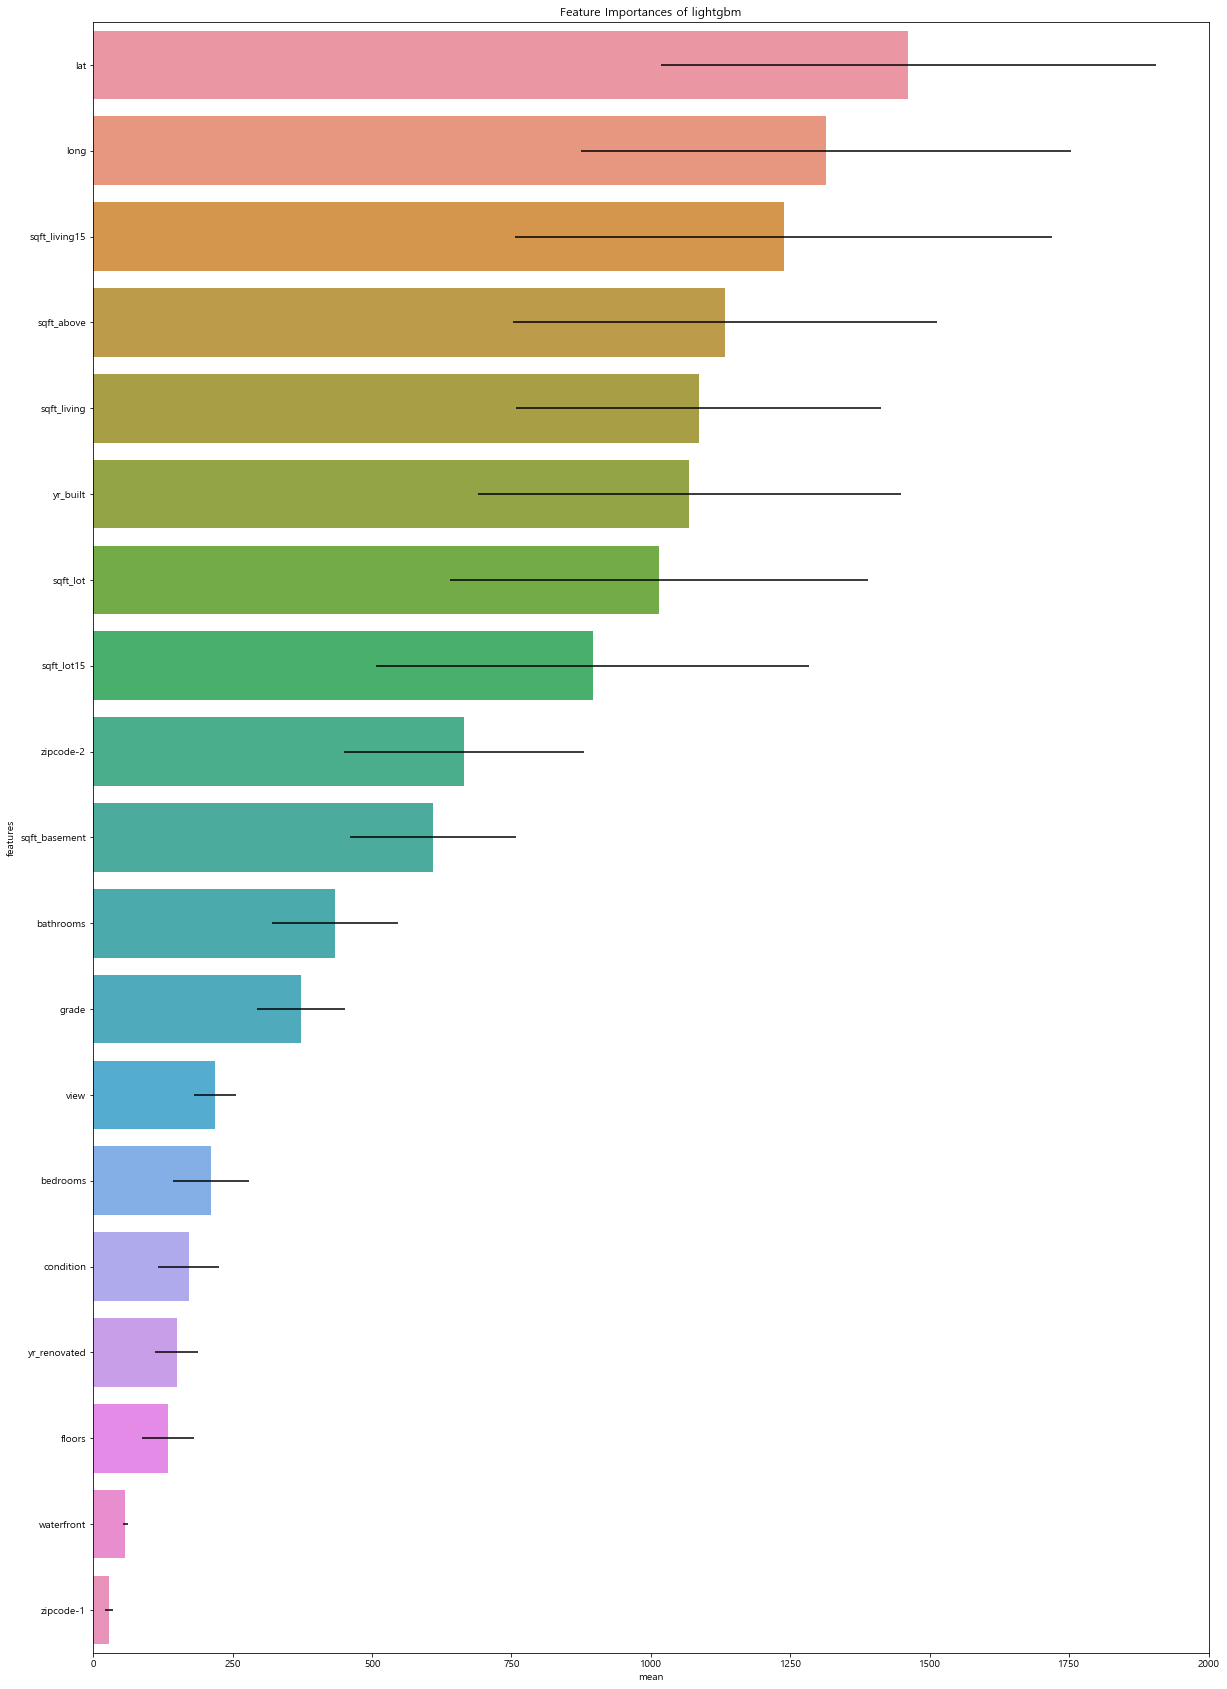

In [90]:
plt.figure(figsize=[20,30])
sns.barplot(x='mean',y='features',data=lgb_fi_sorted,xerr=lgb_fi_sorted["std"])
plt.title("Feature Importances of lightgbm",fontsize=12)

In [91]:
#제출
submission = pd.read_csv("./input_2019-2nd-ml-month-with-kakr/sample_submission.csv")
assert len(submission) == len(predictions)
submission["price"] = predictions
submission.to_csv("./lgb_origin_submission.csv",index=False)

In [92]:
submission.head(10)

,id,price
0,15035,5.074110e+05
1,15036,4.794432e+05
2,15037,1.502493e+06
3,15038,2.927070e+05
4,15039,3.140445e+05
5,15040,3.076428e+05
6,15041,4.305006e+05
7,15042,6.714758e+05
8,15043,2.851873e+05
9,15044,4.880723e+05
